# Resumen de métricas de PyOD

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import cohen_kappa_score

Creamos csv general de etiquetado:

In [2]:
clasificadores = pd.read_csv('Clasificadores/Resultados/KNN_completo.csv')
clasificadores = clasificadores.drop('Y_pred', axis=1)

Leemos la predicción de cada método:

In [3]:
knn = pd.read_csv('Clasificadores/Resultados/KNN_completo.csv',usecols=['Y_pred'])
nn = pd.read_csv('Clasificadores/Resultados/NN_completo.csv',usecols=['Y_pred'])
logicreg = pd.read_csv('Clasificadores/Resultados/LogicReg_completo.csv',usecols=['Y_pred'])
svm = pd.read_csv('Clasificadores/Resultados/SVM_completo.csv',usecols=['Y_pred'])

La unimos al csv general:

In [4]:
clasificadores['KNN'] = knn['Y_pred']
clasificadores['NN'] = nn['Y_pred']
clasificadores['LogicReg'] = logicreg['Y_pred']
clasificadores['SVM'] = svm['Y_pred']

In [5]:
clasificadores = clasificadores.set_index('fecha')

In [6]:
clasificadores.head()

,Negro,CurvaCola,Congelado,Hum,Anomalia,KNN,NN,LogicReg,SVM
fecha,,,,,,,,,
2021-08-01 11:06:00,0,0,0,0,0,0,0,0,0
2021-03-15 11:15:00,0,0,0,0,0,0,0,0,0
2021-10-19 07:04:00,0,0,0,0,0,0,0,0,0
2021-04-17 10:46:00,0,0,0,0,0,0,0,0,1
2021-03-07 19:50:00,0,0,0,0,0,0,0,0,1


## Métricas generales:

In [7]:
anomalias = ['Anomalia','Negro','CurvaCola','Congelado','Hum']
metodos = ['KNN','NN','LogicReg','SVM']
metricas = ['roc_auc','accuracy','precision','kappa','sensibilidad','especificidad']

metricas_generales = pd.DataFrame(index=metodos,columns=metricas)
for metodo in metodos:
    metricas_generales.loc[metodo,metricas[0]] = roc_auc_score(clasificadores['Anomalia'], clasificadores[metodo])
    metricas_generales.loc[metodo,metricas[1]] = accuracy_score(clasificadores['Anomalia'], clasificadores[metodo])
    metricas_generales.loc[metodo,metricas[2]] = precision_score(clasificadores['Anomalia'], clasificadores[metodo])
    metricas_generales.loc[metodo,metricas[3]] = cohen_kappa_score(clasificadores['Anomalia'], clasificadores[metodo])
    metricas_generales.loc[metodo,metricas[4]] = recall_score(clasificadores['Anomalia'], clasificadores[metodo])
    metricas_generales.loc[metodo,metricas[5]] = recall_score(clasificadores['Anomalia'], clasificadores[metodo], pos_label=0)
metricas_generales

,roc_auc,accuracy,precision,kappa,sensibilidad,especificidad
KNN,0.906215,0.962139,0.945528,0.857117,0.821992,0.990438
NN,0.90334,0.955868,0.9046,0.83633,0.824232,0.982448
LogicReg,0.714569,0.902652,0.975633,0.552039,0.431314,0.997825
SVM,0.377888,0.433274,0.099406,-0.13697,0.294475,0.4613


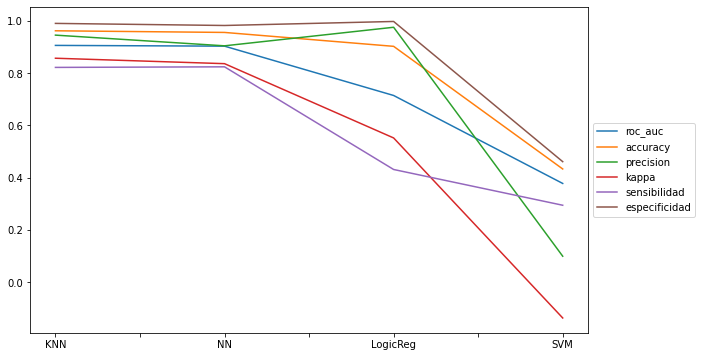

In [8]:
metricas_generales.plot(figsize=(10,6)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

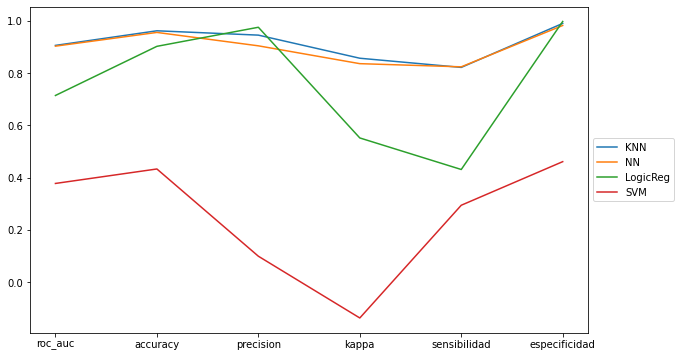

In [9]:
metricas_generales.T.plot(figsize=(10,6)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

## Sensibilidad por tipo de anomalía

In [10]:
sensibilidades = pd.DataFrame(index=metodos, columns=anomalias)

for metodo in metodos:
    for anomalia in anomalias:
        sensibilidades.loc[metodo,anomalia] = recall_score(clasificadores[anomalia], clasificadores[metodo])

sensibilidades

,Anomalia,Negro,CurvaCola,Congelado,Hum
KNN,0.821992,0.99515,0.716211,0.952059,0.886288
NN,0.824232,0.992455,0.694141,0.995206,0.87291
LogicReg,0.431314,0.876314,0.106641,0.923576,0.779264
SVM,0.294475,0.011857,0.513281,0.027355,0.0


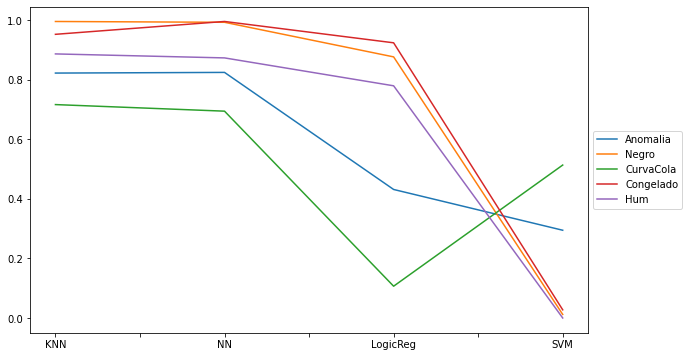

In [11]:
sensibilidades.plot(figsize=(10,6)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

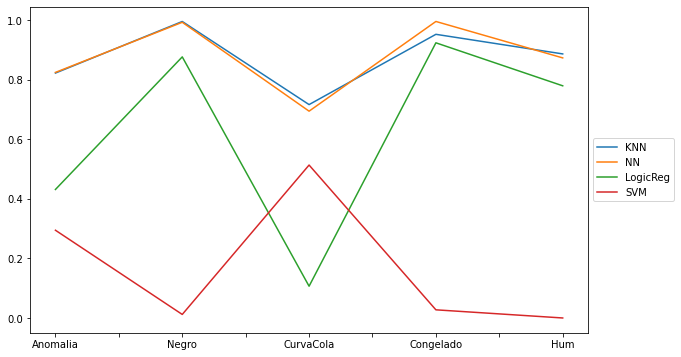

In [12]:
sensibilidades.T.plot(figsize=(10,6)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))